# 🔍 Activation Functions – Theory

## 📘 What Are Activation Functions?

In Artificial Neural Networks (ANNs), each neuron computes a **weighted sum** of its inputs and applies a **non-linear function** called the **activation function**.  

Mathematically:
$$
z = w^T x + b \quad,\quad a = g(z)
$$
Where:
- \( x \): Input vector
- \( w \): Weight vector
- \( b \): Bias
- \( g \): Activation function
- \( a \): Output (activation)

---

## ❓ Why Do We Need Activation Functions?

- Without activation functions, the neural network behaves like a **linear model**, regardless of depth.
- **Non-linearity** is needed to learn complex patterns like XOR, image features, etc.
- Helps neural networks to **learn, generalize**, and **converge faster**.

---

## ✅ Ideal Properties of an Activation Function

| Property                  | Why It Matters                                         |
|--------------------------|--------------------------------------------------------|
| 🔹 Non-linearity          | Enables complex pattern learning                       |
| 🔹 Differentiability       | Needed for backpropagation (gradient calculation)     |
| 🔹 Computationally Cheap  | Faster training                                        |
| 🔹 Zero-centered output   | Improves convergence and optimization                  |
| 🔹 Non-saturating gradient| Avoids vanishing gradients                             |

---

## 📚 Common Activation Functions

---

### 1️⃣ Sigmoid (Logistic Function)

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

- **Range**: (0, 1)  
- **Smooth S-shaped curve**

**Advantages**:
- Probabilistic interpretation (used in binary classification output)
- Non-linear and differentiable

**Disadvantages**:
- Not zero-centered
- Saturating at both ends → **vanishing gradient**
- Slow convergence
- Computationally expensive (uses exponential)

---

### 2️⃣ Tanh (Hyperbolic Tangent)

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
- **Range**: (-1, 1)

**Advantages**:
- Zero-centered
- Stronger gradients than sigmoid

**Disadvantages**:
- Saturates at both ends → still **vanishing gradient**
- Computationally expensive

---

### 3️⃣ ReLU (Rectified Linear Unit)

$$
f(x) = \max(0, x)
$$

- **Range**: [0, ∞)

**Advantages**:
- Computationally efficient
- Non-saturating → fast convergence
- Sparse activation (some neurons output 0)

**Disadvantages**:
- Not zero-centered
- Not differentiable at 0
- **Dying ReLU** problem → neurons get stuck outputting 0

---

### 4️⃣ Leaky ReLU

$$
f(x) = 
\begin{cases}
x & \text{if } x \geq 0 \\
\alpha x & \text{if } x < 0
\end{cases}
\quad \text{where } \alpha \text{ is small (e.g., 0.01)}
$$

**Advantages**:
- Solves dying ReLU problem
- Simple and efficient

**Disadvantages**:
- Slight inconsistency due to small gradient on negative side

---

### 5️⃣ Parametric ReLU (PReLU)

$$
f(x) = 
\begin{cases}
x & x \geq 0 \\
a x & x < 0
\end{cases}
\quad \text{where } a \text{ is a learned parameter}
$$

**Advantages**:
- Learns best leak factor for each unit
- More flexible than Leaky ReLU

**Disadvantages**:
- Slightly more complex training

---

### 6️⃣ ELU (Exponential Linear Unit)

$$
f(x) =
\begin{cases}
x & x > 0 \\
\alpha (e^x - 1) & x \leq 0
\end{cases}
$$

**Advantages**:
- Non-saturating for \( x > 0 \)
- Zero-centered
- Smooth and continuous

**Disadvantages**:
- Computationally expensive due to exponential

---

### 7️⃣ SELU (Scaled ELU)

$$
f(x) =
\begin{cases}
\lambda x & x > 0 \\
\lambda \alpha (e^x - 1) & x \leq 0
\end{cases}
\quad \text{where } \lambda \approx 1.0507, \alpha \approx 1.6733
$$

**Advantages**:
- Self-normalizing → keeps activations mean ~0 and variance ~1
- Helps faster convergence

**Disadvantages**:
- Slightly more complex
- Mostly used with specific architectures

---

## 🔁 Saturating vs Non-Saturating Functions

| Function   | Saturating? | Zero-Centered | Dying Problem | Fast Convergence |
|------------|-------------|----------------|----------------|------------------|
| Sigmoid    | ✅ Yes       | ❌ No           | ❌ No           | ❌ No             |
| Tanh       | ✅ Yes       | ✅ Yes          | ❌ No           | ⛔ Medium         |
| ReLU       | ❌ No        | ❌ No           | ✅ Yes          | ✅ Yes            |
| Leaky ReLU | ❌ No        | ❌ No           | ❌ No           | ✅ Yes            |
| PReLU      | ❌ No        | ❌ No           | ❌ No           | ✅ Yes            |
| ELU        | ❌ No        | ✅ Approx.      | ❌ No           | ✅ Yes            |
| SELU       | ❌ No        | ✅ Approx.      | ❌ No           | ✅ Fastest        |

---



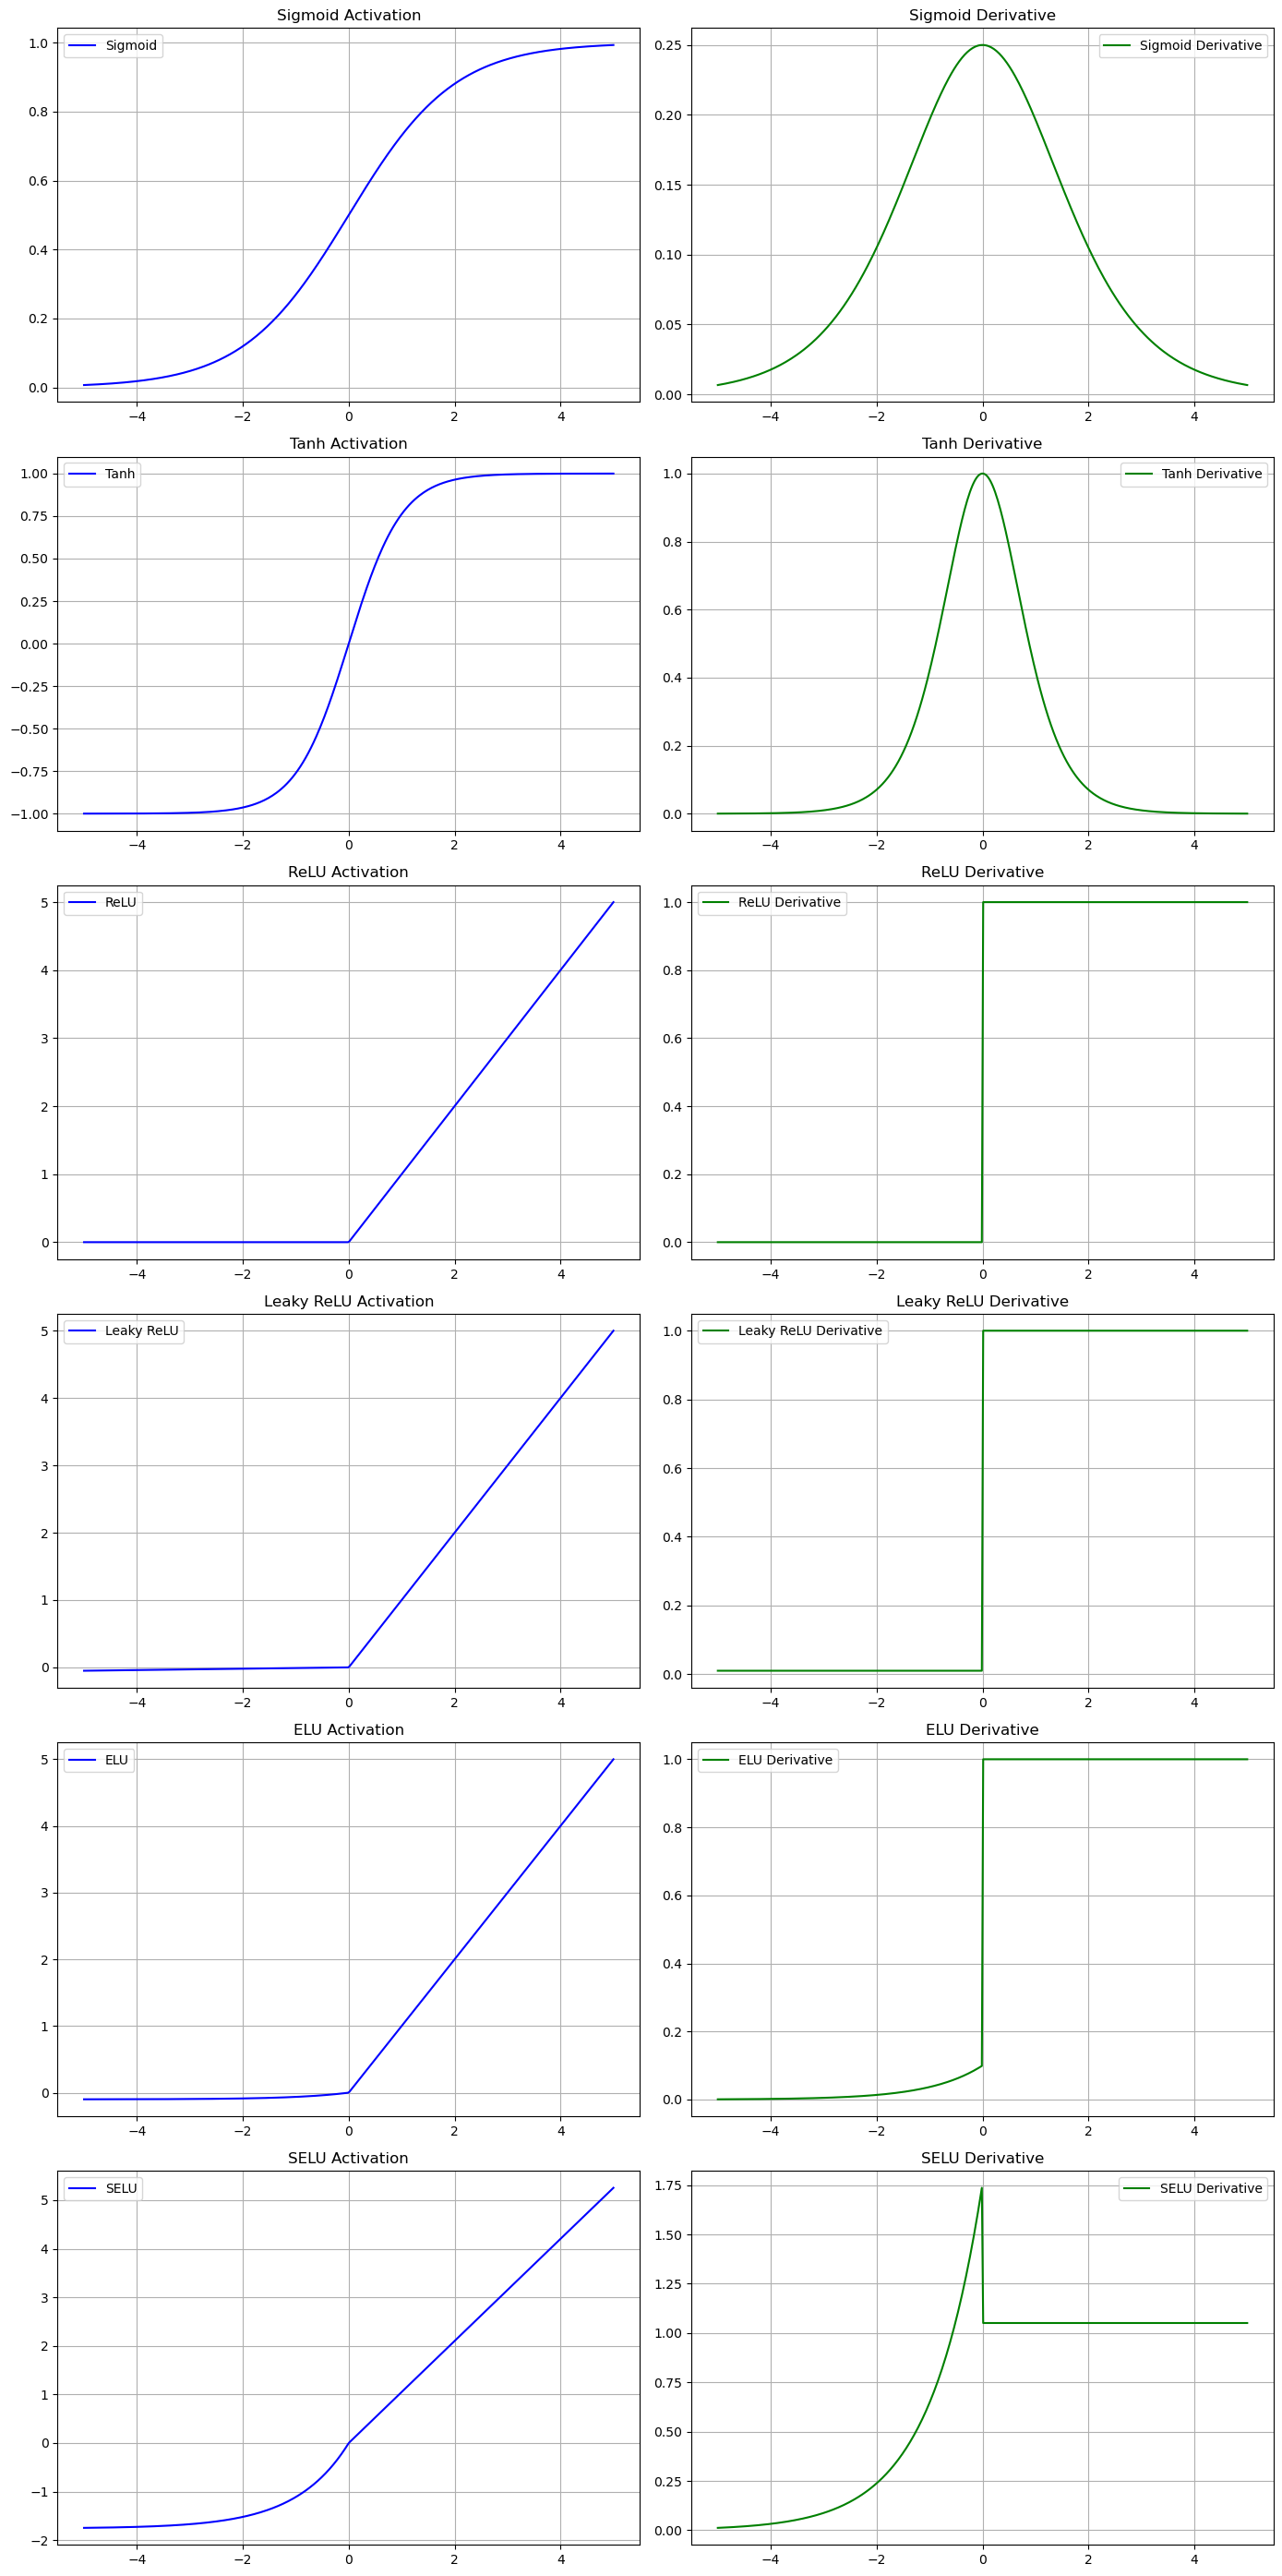

In [1]:
# Re-importing necessary libraries after state reset
import matplotlib.pyplot as plt
import numpy as np

# Generate input values
x = np.linspace(-5, 5, 400)
x_relu = np.copy(x)
x_relu[x_relu < 0] = 0.01 * x_relu[x_relu < 0]  # For Leaky ReLU

# Define activation functions
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_deriv = sigmoid * (1 - sigmoid)

tanh = np.tanh(x)
tanh_deriv = 1 - tanh**2

relu = np.maximum(0, x)
relu_deriv = (x > 0).astype(float)

leaky_relu = np.where(x > 0, x, 0.01 * x)
leaky_relu_deriv = np.where(x > 0, 1, 0.01)

elu = np.where(x > 0, x, 0.1 * (np.exp(x) - 1))
elu_deriv = np.where(x > 0, 1, 0.1 * np.exp(x))

# SELU constants
alpha = 1.6733
scale = 1.0507
selu = np.where(x > 0, scale * x, scale * alpha * (np.exp(x) - 1))
selu_deriv = np.where(x > 0, scale, selu + scale * alpha)

# Plot setup
fig, axes = plt.subplots(6, 2, figsize=(14, 28))
activation_data = [
    ("Sigmoid", sigmoid, sigmoid_deriv),
    ("Tanh", tanh, tanh_deriv),
    ("ReLU", relu, relu_deriv),
    ("Leaky ReLU", leaky_relu, leaky_relu_deriv),
    ("ELU", elu, elu_deriv),
    ("SELU", selu, selu_deriv)
]

# Plot each activation and its derivative
for i, (name, act, deriv) in enumerate(activation_data):
    axes[i][0].plot(x, act, label=f'{name}', color='blue')
    axes[i][0].set_title(f'{name} Activation')
    axes[i][0].grid(True)
    axes[i][0].legend()

    axes[i][1].plot(x, deriv, label=f'{name} Derivative', color='green')
    axes[i][1].set_title(f'{name} Derivative')
    axes[i][1].grid(True)
    axes[i][1].legend()

plt.tight_layout()
plt.show()


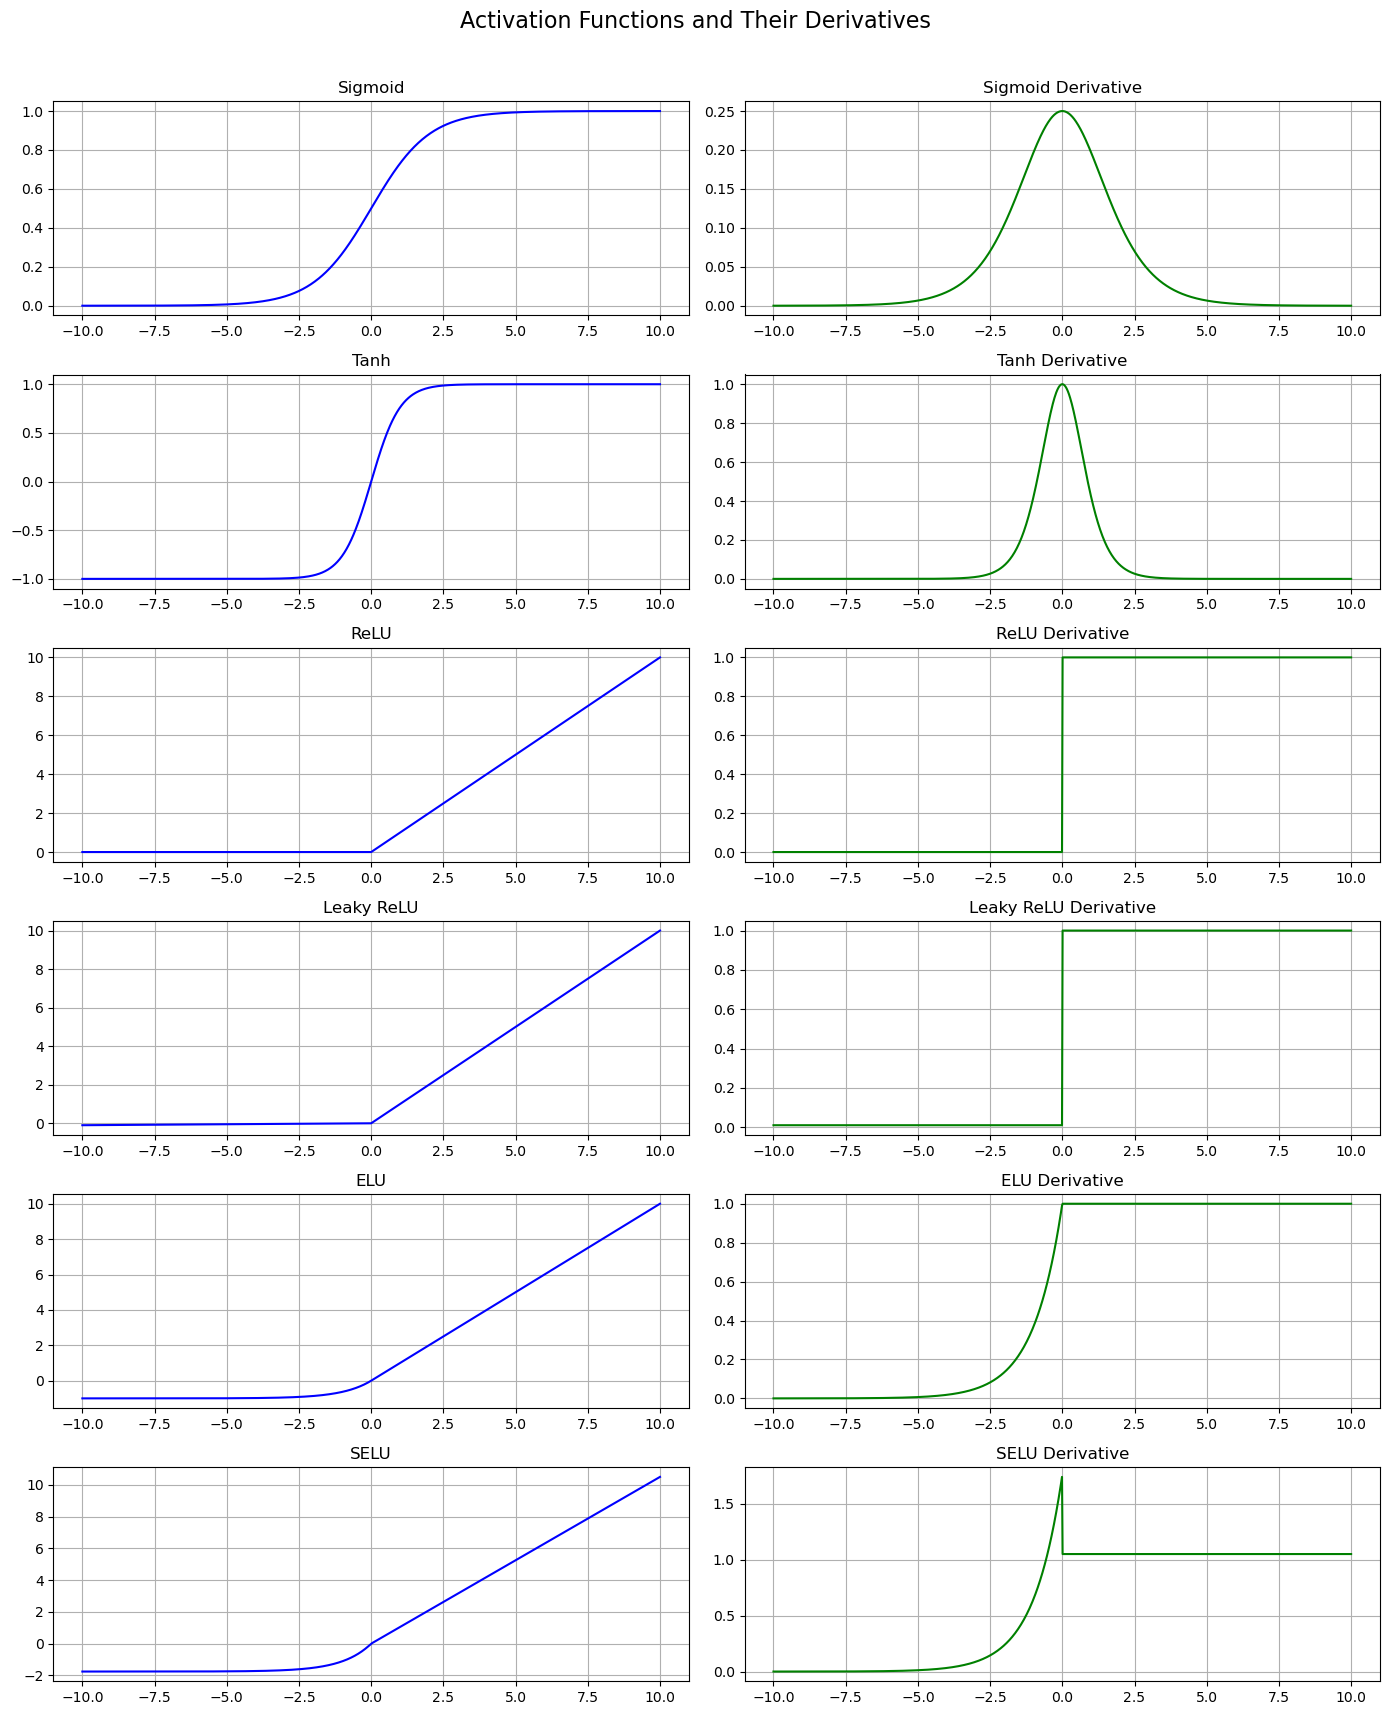

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions and their derivatives
x = np.linspace(-10, 10, 1000)

# Sigmoid
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_derivative = sigmoid * (1 - sigmoid)

# Tanh
tanh = np.tanh(x)
tanh_derivative = 1 - tanh**2

# ReLU
relu = np.maximum(0, x)
relu_derivative = np.where(x > 0, 1, 0)

# Leaky ReLU
alpha = 0.01
leaky_relu = np.where(x > 0, x, alpha * x)
leaky_relu_derivative = np.where(x > 0, 1, alpha)

# ELU
alpha_elu = 1.0
elu = np.where(x > 0, x, alpha_elu * (np.exp(x) - 1))
elu_derivative = np.where(x > 0, 1, elu + alpha_elu)

# SELU
lambda_selu = 1.0507
alpha_selu = 1.67326
selu = lambda_selu * np.where(x > 0, x, alpha_selu * (np.exp(x) - 1))
selu_derivative = np.where(x > 0, lambda_selu, lambda_selu * alpha_selu * np.exp(x))

# Plot all functions and their derivatives side-by-side
fig, axs = plt.subplots(6, 2, figsize=(14, 18))
fig.suptitle("Activation Functions and Their Derivatives", fontsize=16)

functions = [
    ("Sigmoid", sigmoid, sigmoid_derivative),
    ("Tanh", tanh, tanh_derivative),
    ("ReLU", relu, relu_derivative),
    ("Leaky ReLU", leaky_relu, leaky_relu_derivative),
    ("ELU", elu, elu_derivative),
    ("SELU", selu, selu_derivative),
]

for i, (name, func, deriv) in enumerate(functions):
    axs[i][0].plot(x, func, label=f"{name}", color='blue')
    axs[i][0].set_title(f"{name}")
    axs[i][0].grid(True)
    axs[i][1].plot(x, deriv, label=f"{name} Derivative", color='green')
    axs[i][1].set_title(f"{name} Derivative")
    axs[i][1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


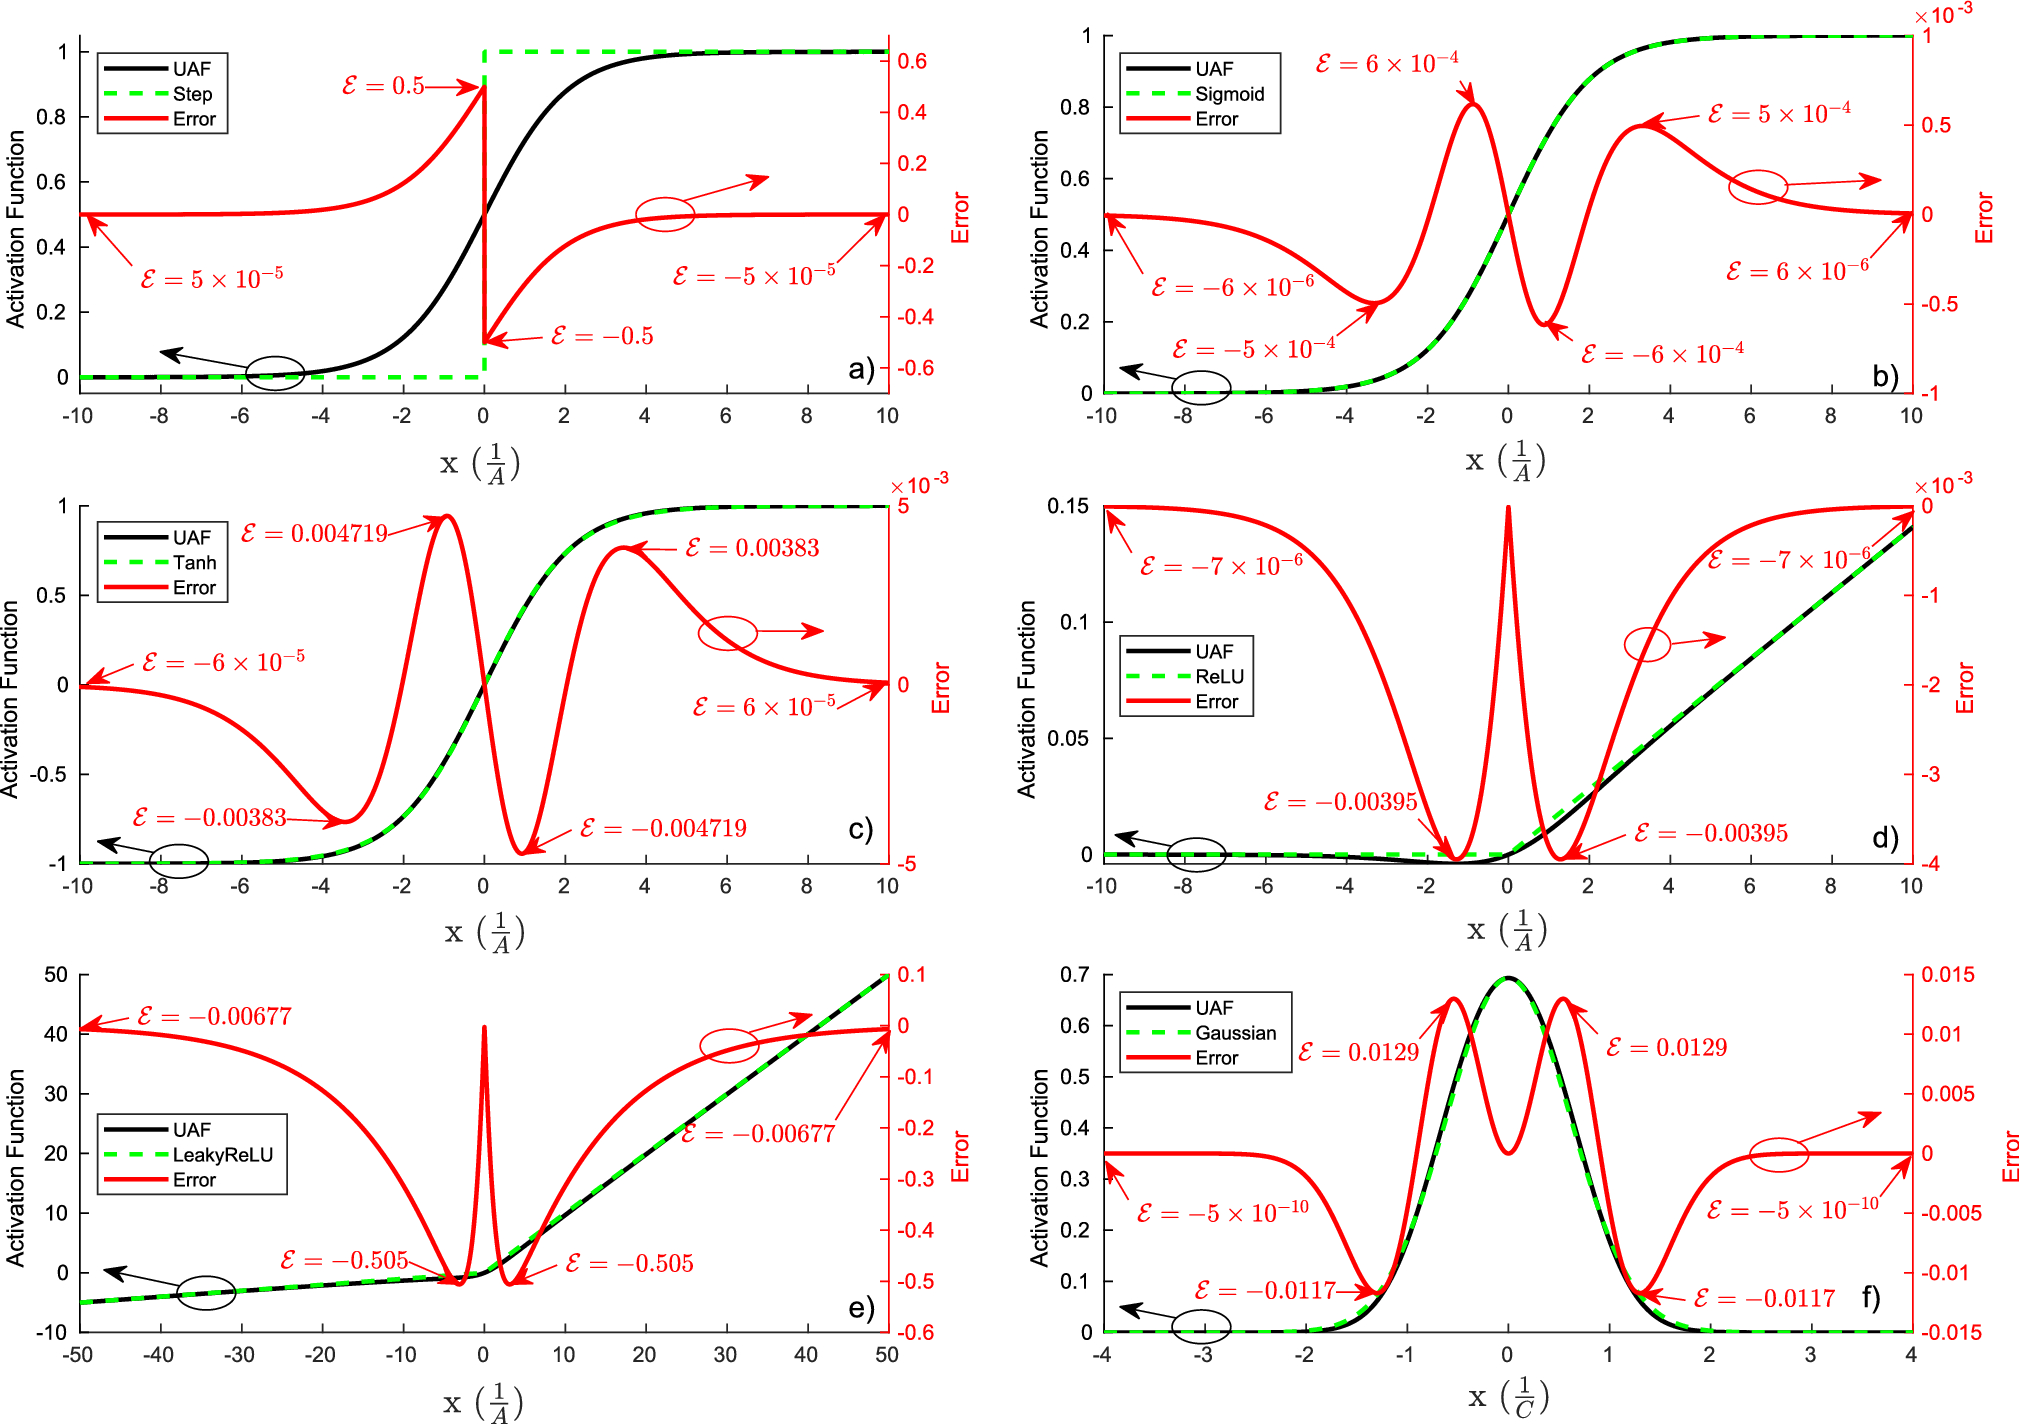

## 🔢 Activation Functions – Summary Table

| Activation Function | Formula                                                                                                                   | Output Range | Derivative Formula                                                        | Notes                                            |
| ------------------- | ------------------------------------------------------------------------------------------------------------------------- | ------------ | ------------------------------------------------------------------------- | ------------------------------------------------ |
| **Sigmoid**         | $\sigma(x) = \dfrac{1}{1 + e^{-x}}$                                                                                       | (0, 1)       | $\sigma'(x) = \sigma(x)(1 - \sigma(x))$                                   | Saturates at 0 and 1 → vanishing gradients       |
| **Tanh**            | $\tanh(x) = \dfrac{e^x - e^{-x}}{e^x + e^{-x}}$                                                                           | (-1, 1)      | $\tanh'(x) = 1 - \tanh^2(x)$                                              | Zero-centered, but still saturates               |
| **ReLU**            | $f(x) = \max(0, x)$                                                                                                       | [0, ∞)       | $f'(x) = \begin{cases} 1 & x > 0 \\ 0 & x \leq 0 \end{cases}$             | Fast, but can suffer from "dying neurons"        |
| **Leaky ReLU**      | $f(x) = \begin{cases} x & x > 0 \\ \alpha x & x \leq 0 \end{cases}, \quad \alpha = 0.01$                                  | (-∞, ∞)      | $f'(x) = \begin{cases} 1 & x > 0 \\ \alpha & x \leq 0 \end{cases}$        | Allows small gradient when $x < 0$               |
| **ELU**             | $f(x) = \begin{cases} x & x > 0 \\ \alpha(e^x - 1) & x \leq 0 \end{cases}, \quad \alpha = 1.0$                             | (-α, ∞)      | $f'(x) = \begin{cases} 1 & x > 0 \\ f(x) + \alpha & x \leq 0 \end{cases}$ | Smooth, avoids dead neurons                      |
| **SELU**            | $f(x) = \lambda \begin{cases} x & x > 0 \\ \alpha(e^x - 1) & x \leq 0 \end{cases}$  <br> $\lambda = 1.0507,\ \alpha = 1.67326$ | (-∞, ∞)  | Scaled derivative (same form)                                             | Self-normalizing for deep nets                   |


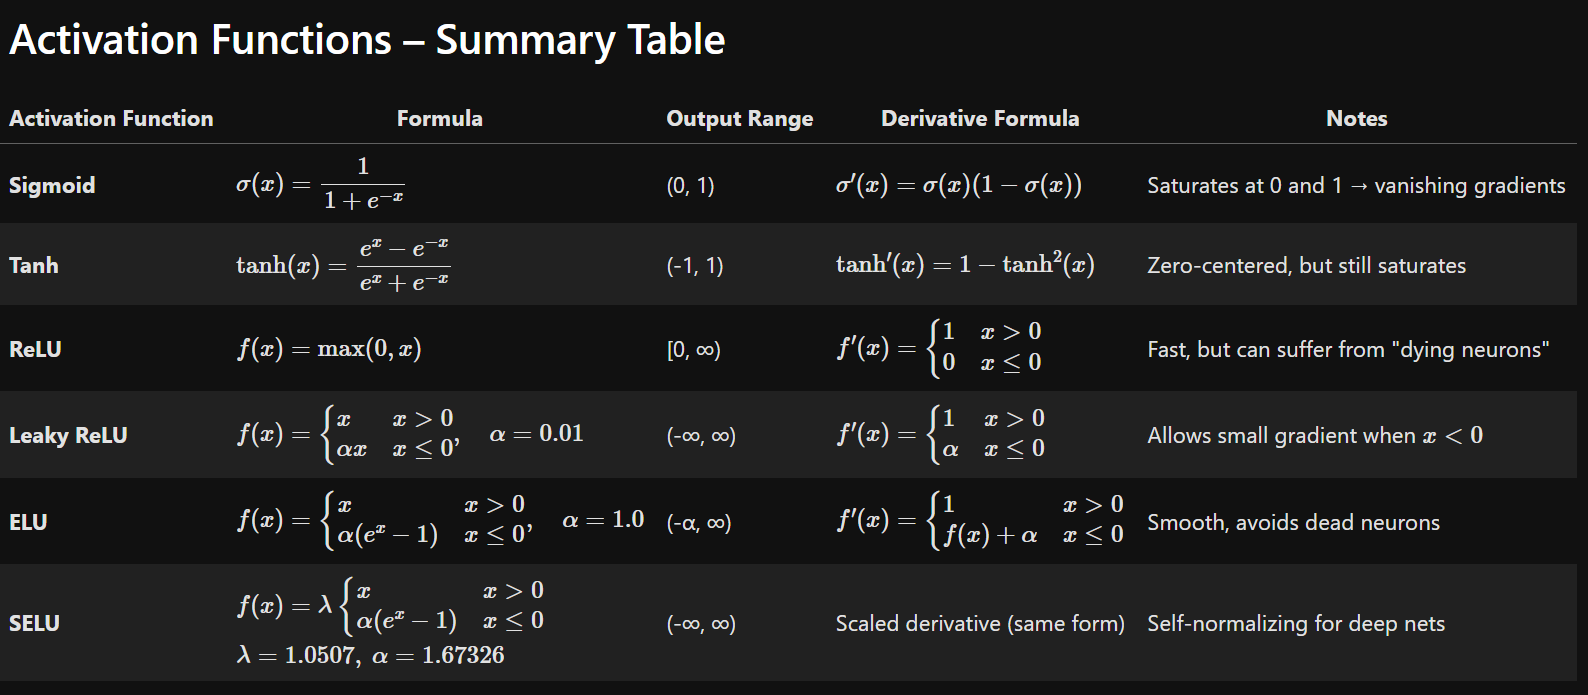